# Atividade 3
## Redes neurais convolucionais

### *Alexandre marcondes*

Atividades:

1. Montar o ambiente para executar tensorflow com gpu (tensorflow-gpu);
2. Executar código do mnist;
3. Fazer teste com uma rede treinada (VGG16);
4. Utilizar a mesma topologia de rede neural usada para o problema minist, aplicando para o problema das abelhas;
5. Compare o tempo de treino da rede neural CNN usando CPUxGPU;

---

# 1. Montar o ambiente para executar tensorflow com gpu

Este ambiente (tf_env) foi criado no conda utilizando a versão do tensorflow com suporte a GPU (tensorflow-gpu).

Podemos utilizar o código abaixo para conferir se o tensorflow está de fato funcionando com suporte a GPU.

# 2. Executar o código do mnist.

In [1]:
import pathlib

import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)

import numpy as np

import cv2

from PIL import Image
import matplotlib.pyplot as plt
import os
import pathlib

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras.layers import Input

from tensorflow.python.keras.preprocessing import image
from tensorflow.python.keras.applications.inception_v3 import *


from tensorflow.keras import layers
from tensorflow.keras import models

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(tf.compat.v1.__version__)

2.2.0-dev20200505


In [2]:
# Checa a presença da CPU e da GPU
print(tf.config.experimental.list_physical_devices('GPU'))
print(tf.config.experimental.list_physical_devices('CPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [3]:
# Checa se o dispositivo padrão atual é a GPU
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


### Organizando o dataset

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### Criando a rede neural

In [5]:
# Camada densa com ativação softmax para ativação 
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
# Camada flatten
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

In [6]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                54090     
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
model.fit(train_images, train_labels, epochs=5)#, batch_size=64)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2212 - accuracy: 0.9360
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0909 - accuracy: 0.9740
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0716 - accuracy: 0.9793
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0631 - accuracy: 0.9819
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0571 - accuracy: 0.9837


In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\nAcurácia no conjunto de teste: {}'.format(test_acc))

313/313 [==============================] - 0s 1ms/step - loss: 0.0569 - accuracy: 0.9812

Acurácia no conjunto de teste: 0.9811999797821045


# 3. Fazer teste com uma rede treinada (VGG16)

Vamos utilizar a rede pré-treinada VGG16 para tentar identificar algumas imagens.

In [10]:
model_vgg = VGG16()

In [11]:
def carrega(file):
    imagem = load_img(file, target_size=(224, 224))
    plt.axis(False)
    plt.imshow(imagem)
    plt.show()
    return imagem

def identifica(image):
    # Converter pixels em um array
    image = img_to_array(image)
    # acertar formato do array para o modelo
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # calcular probabilidade considerando todos os "labels"
    yhat = model_vgg.predict(image)
    # Codificar as probabilidades retornadas nos "labels"
    label = decode_predictions(yhat)
    for i, (imagenetID, obj, prob) in enumerate(label[0]):
        print('{} - {}: {:.2f}%'.format(i+1, obj, prob*100))

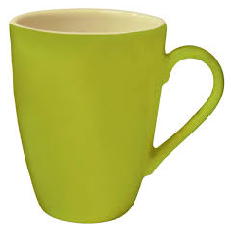

1 - cup: 55.06%
2 - coffee_mug: 43.99%
3 - pitcher: 0.57%
4 - water_jug: 0.17%
5 - coffeepot: 0.04%


In [12]:
imagem = 'figs/xicara.jpeg'
imagem = carrega(imagem)
identifica(imagem)

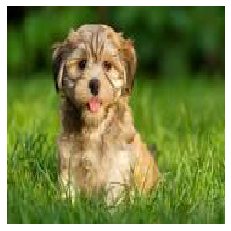

1 - Tibetan_terrier: 64.15%
2 - otterhound: 7.78%
3 - standard_schnauzer: 7.21%
4 - Dandie_Dinmont: 6.82%
5 - clumber: 3.37%


In [13]:
imagem = 'figs/dog.jpeg'
imagem = carrega(imagem)
identifica(imagem)

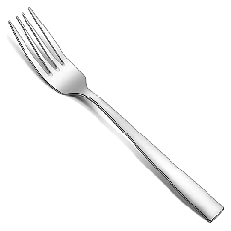

1 - spatula: 91.91%
2 - strainer: 4.48%
3 - ladle: 2.43%
4 - letter_opener: 1.11%
5 - can_opener: 0.04%


In [14]:
imagem = 'figs/garfo.jpg'
imagem = carrega(imagem)
identifica(imagem)

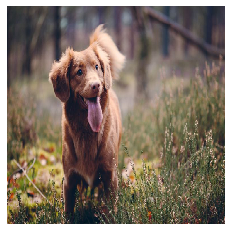

1 - clumber: 56.77%
2 - English_setter: 28.56%
3 - Weimaraner: 7.80%
4 - Brittany_spaniel: 3.23%
5 - flat-coated_retriever: 1.25%


In [15]:
imagem = 'figs/cachorro.jpg'
imagem = carrega(imagem)
identifica(imagem)

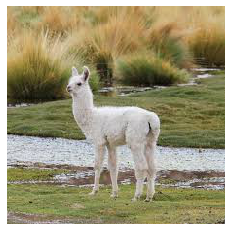

1 - llama: 99.98%
2 - white_wolf: 0.01%
3 - kuvasz: 0.01%
4 - Ibizan_hound: 0.00%
5 - borzoi: 0.00%


In [16]:
imagem = 'figs/lhama.jpg'
imagem = carrega(imagem)
identifica(imagem)

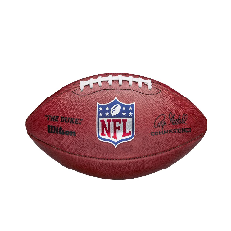

1 - pick: 63.71%
2 - puck: 20.00%
3 - rugby_ball: 6.38%
4 - face_powder: 2.61%
5 - wool: 1.09%


In [17]:
imagem = 'figs/football.jpeg'
imagem = carrega(imagem)
identifica(imagem)

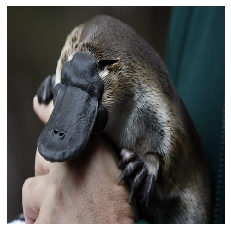

1 - platypus: 69.31%
2 - otter: 4.56%
3 - mink: 2.70%
4 - weasel: 1.79%
5 - hamster: 1.70%


In [18]:
imagem = 'figs/ornitorrinco.jpg'
imagem = carrega(imagem)
identifica(imagem)

# 4.Utilizar a mesma topologia de rede neural usada para o problema minist, aplicando para o problema das abelhas;


In [19]:
main_dir = "wingsEv"
train_dir = "wingsEval"
path = os.path.join(main_dir,train_dir)

# Percorre os arquivos no diretório de imagens para treinamento
def create_test_data(path):
    for p in os.listdir(path):
        if '.jpg' in p:
            
            # categoria da imagem é definida pelo nome do arquivo
            category = p.split(" ")[0]

            # Abre a imagem usando opencv em escala de cinza
            img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)

            # Redimensionamento para 80 x 80 pixels
            new_img_array = cv2.resize(img_array, dsize=(80, 80))

            X.append(new_img_array)
            y.append(category)
            
path="wingsEval/"

X = []
y = []
create_test_data(path)
X = np.array(X)
y = np.array(y)

print("Dimensões originais do dataset:")
print(np.array(X).shape)
print(np.array(y).shape)

size = 80*80
X = np.array(X).reshape(-1, 80, 80, 1)
print('Dimensão das imagens após planificar:')
print(X.shape)

Dimensões originais do dataset:
(1736, 80, 80)
(1736,)
Dimensão das imagens após planificar:
(1736, 80, 80, 1)


In [20]:
from sklearn.preprocessing import LabelEncoder

# Pré processamento
# Escalamento dos valores de X
X = X.astype('float32')/255
# Label encoder das classes em y
# Primeiramente as classes são tranformadas representações por números inteiros
le = LabelEncoder()
y = le.fit_transform(y)
# Após a aplicação do LabelEncoder, utiliza-se to_categorical do Keras
# to_categorical(y) é equivalente ao OneHotEncoder, transformando em uma matriz Numpy
y = to_categorical(y)
print('Número de classes (tipo de abelhas): {}'.format(y.shape[1]))

Número de classes (tipo de abelhas): 25


In [21]:
# Função para criar a rede
def create_cnn():
    # Camada densa com ativação softmax para ativação 
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(80, 80, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    # Camada flatten
    model.add(layers.Flatten())
    model.add(layers.Dense(25, activation='softmax'))
    model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    print(model.summary())
    return model

In [22]:
# Criando o modelo
model = create_cnn()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 78, 78, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 39, 39, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 48672)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 25)                1216825   
Total params: 1,217,145
Trainable params: 1,217,145
Non-trainable params: 0
_________________________________________________________________
None


In [23]:
# Treinando o modelo
history = model.fit(X, y, validation_split=0.2, epochs=20)

Epoch 1/20
44/44 [==============================] - 0s 8ms/step - loss: 3.8551 - accuracy: 0.0872 - val_loss: 3.0593 - val_accuracy: 0.1092
Epoch 2/20
44/44 [==============================] - 0s 6ms/step - loss: 2.5735 - accuracy: 0.2147 - val_loss: 2.6918 - val_accuracy: 0.1753
Epoch 3/20
44/44 [==============================] - 0s 5ms/step - loss: 2.2447 - accuracy: 0.3156 - val_loss: 2.7732 - val_accuracy: 0.1724
Epoch 4/20
44/44 [==============================] - 0s 6ms/step - loss: 2.0048 - accuracy: 0.4150 - val_loss: 2.6709 - val_accuracy: 0.1954
Epoch 5/20
44/44 [==============================] - 0s 6ms/step - loss: 1.7554 - accuracy: 0.4986 - val_loss: 2.7044 - val_accuracy: 0.2011
Epoch 6/20
44/44 [==============================] - 0s 6ms/step - loss: 1.5565 - accuracy: 0.5785 - val_loss: 2.7161 - val_accuracy: 0.1983
Epoch 7/20
44/44 [==============================] - 0s 6ms/step - loss: 1.3894 - accuracy: 0.6369 - val_loss: 2.8628 - val_accuracy: 0.2069
Epoch 8/20
44/44 [==

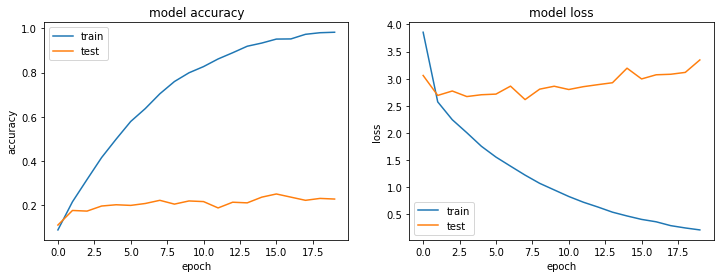

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(12,4))
# summarize history for accuracy
axs[0].plot(history.history['accuracy'])
axs[0].plot(history.history['val_accuracy'])
axs[0].set_title('model accuracy')
axs[0].set_ylabel('accuracy')
axs[0].set_xlabel('epoch')
axs[0].legend(['train', 'test'], loc='upper left')
# summarize history for loss
axs[1].plot(history.history['loss'])
axs[1].plot(history.history['val_loss'])
axs[1].set_title('model loss')
axs[1].set_ylabel('loss')
axs[1].set_xlabel('epoch')
axs[1].legend(['train', 'test'], loc='lower left')
plt.show()

Como se pode observar acima, provavelmente há overfit no modelo utilizado.

Posteriormente, tentaremos solucionar este problema com duas soluções:

* Utilização de camadas de dropout;
* Cross validation.

# 5. Compare o tempo de treino da rede neural CNN usando CPUxGPU;

In [26]:
from time import time
model = create_cnn()
time_cpu = []
for i in range(0,10):
    with tf.device('/cpu:0'):
        starttime = time()
        history_cpu = model.fit(X, y, validation_split=0.2, epochs=10, verbose=0)
        time_cpu.append(time()-starttime)

model = create_cnn()
time_gpu = []
for i in range(0,10):
    with tf.device('/gpu:0'):
        starttime = time()
        history_gpu = model.fit(X, y, validation_split=0.2, epochs=10, verbose=0)
        time_gpu.append(time()-starttime)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 78, 78, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 39, 39, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 48672)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 25)                1216825   
Total params: 1,217,145
Trainable params: 1,217,145
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 78, 78, 32)        320       
_________________

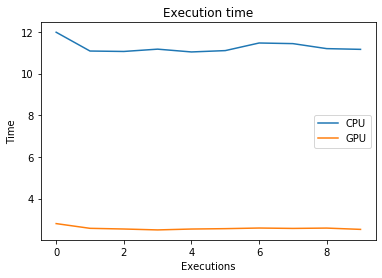

In [30]:
fig, ax = plt.subplots()
# summarize history for accuracy
ax.plot(time_cpu)
ax.plot(time_gpu)
ax.set_title('Execution time')
ax.set_ylabel('Time')
ax.set_xlabel('Executions')
ax.legend(['CPU', 'GPU'], loc='center right')
plt.show()